# Classification Tree: Python Exercise

## Post-Pruning

### Preprocessing

Install packages & write a performance evaluation function

In [2]:
%pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

import graphviz 

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
# Performance Evaluation Function ------------------------------------------------
def perf_eval(cm):
    _tp = cm[1, 1]
    _fn = cm[1, 0]
    _fp = cm[0, 1]
    _tn = cm[0, 0]

    # True positive rate: TPR (Recall)
    TPR = _tp / (_tp + _fn)
    # Precision
    PRE = _tp/(_tp+_fp)
    # True negative rate: TNR
    TNR = _tn/(_tn+_fp)
    # Simple Accuracy
    ACC = (_tp + _tn) / np.sum(cm)
    # Balanced Correction Rate
    BCR = np.sqrt(TPR*TNR)
    # F1-Measure
    F1 = 2*TPR*PRE/(TPR+PRE)
    
    return TPR, PRE, TNR, ACC, BCR, F1

In [5]:
# Performance table
Perf_Table = pd.DataFrame(index=["Post-Pruning", "Pre-Pruning"],
                          columns = ["TPR", "Precision", "TNR",  
                                     "Accuracy", "BCR", "F1-Measure"])

In [6]:
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,NaN,NaN,NaN,NaN,NaN,NaN
Pre-Pruning,NaN,NaN,NaN,NaN,NaN,NaN


Load the dataset and set the input/target indices

In [7]:
# Load the data & Preprocessing
Ploan = pd.read_csv("Personal Loan.csv")
columns = Ploan.columns.values
input_idx = [1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13]
target_idx = 9

Ploan_input = Ploan[columns[input_idx]]
Ploan_target = Ploan[columns[target_idx]]

In [8]:
Ploan

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,46,22,70,94701,4,1.9,1,212,0,0,0,0,1
2496,2497,63,37,32,93117,3,0.7,2,141,0,0,0,0,0
2497,2498,33,9,14,95133,3,0.9,3,114,0,0,0,0,0
2498,2499,38,14,111,92028,2,6.1,1,326,0,0,0,0,0


In [9]:
Ploan_input

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2495,46,22,70,4,1.9,1,212,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0
2497,33,9,14,3,0.9,3,114,0,0,0,0
2498,38,14,111,2,6.1,1,326,0,0,0,0


In [10]:
Ploan_target

0       0
1       0
2       0
3       0
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Personal Loan, Length: 2500, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(Ploan_input, 
                                                    Ploan_target, 
                                                    train_size=1500,
                                                    shuffle=False,
                                                    random_state=12345)

In [12]:
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1495,52,28,178,3,5.4,3,147,0,0,1,0
1496,36,12,18,1,0.5,3,0,0,0,0,1
1497,45,21,73,1,0.8,3,0,0,0,1,0
1498,49,23,125,1,7.3,1,0,0,0,0,0


In [13]:
X_test

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1500,54,28,74,2,1.1,1,0,0,0,1,0
1501,30,4,35,2,0.3,2,0,1,0,0,1
1502,65,39,113,1,2.0,1,0,0,0,1,1
1503,34,8,52,4,2.2,2,0,0,0,0,0
1504,30,6,191,2,4.4,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,46,22,70,4,1.9,1,212,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0
2497,33,9,14,3,0.9,3,114,0,0,0,0
2498,38,14,111,2,6.1,1,326,0,0,0,0


### Training and Evaluation (Post-Pruning)

Training and evaluating CART

In [14]:
# Classification and Regression Tree (CART) --------------------------------------
# Training the tree
clf = DecisionTreeClassifier(random_state=12345)
CART_post = clf.fit(X_train, y_train)

In [15]:
clf.score(X_train, y_train)

1.0

In [16]:
clf.score(X_test, y_test)


0.976

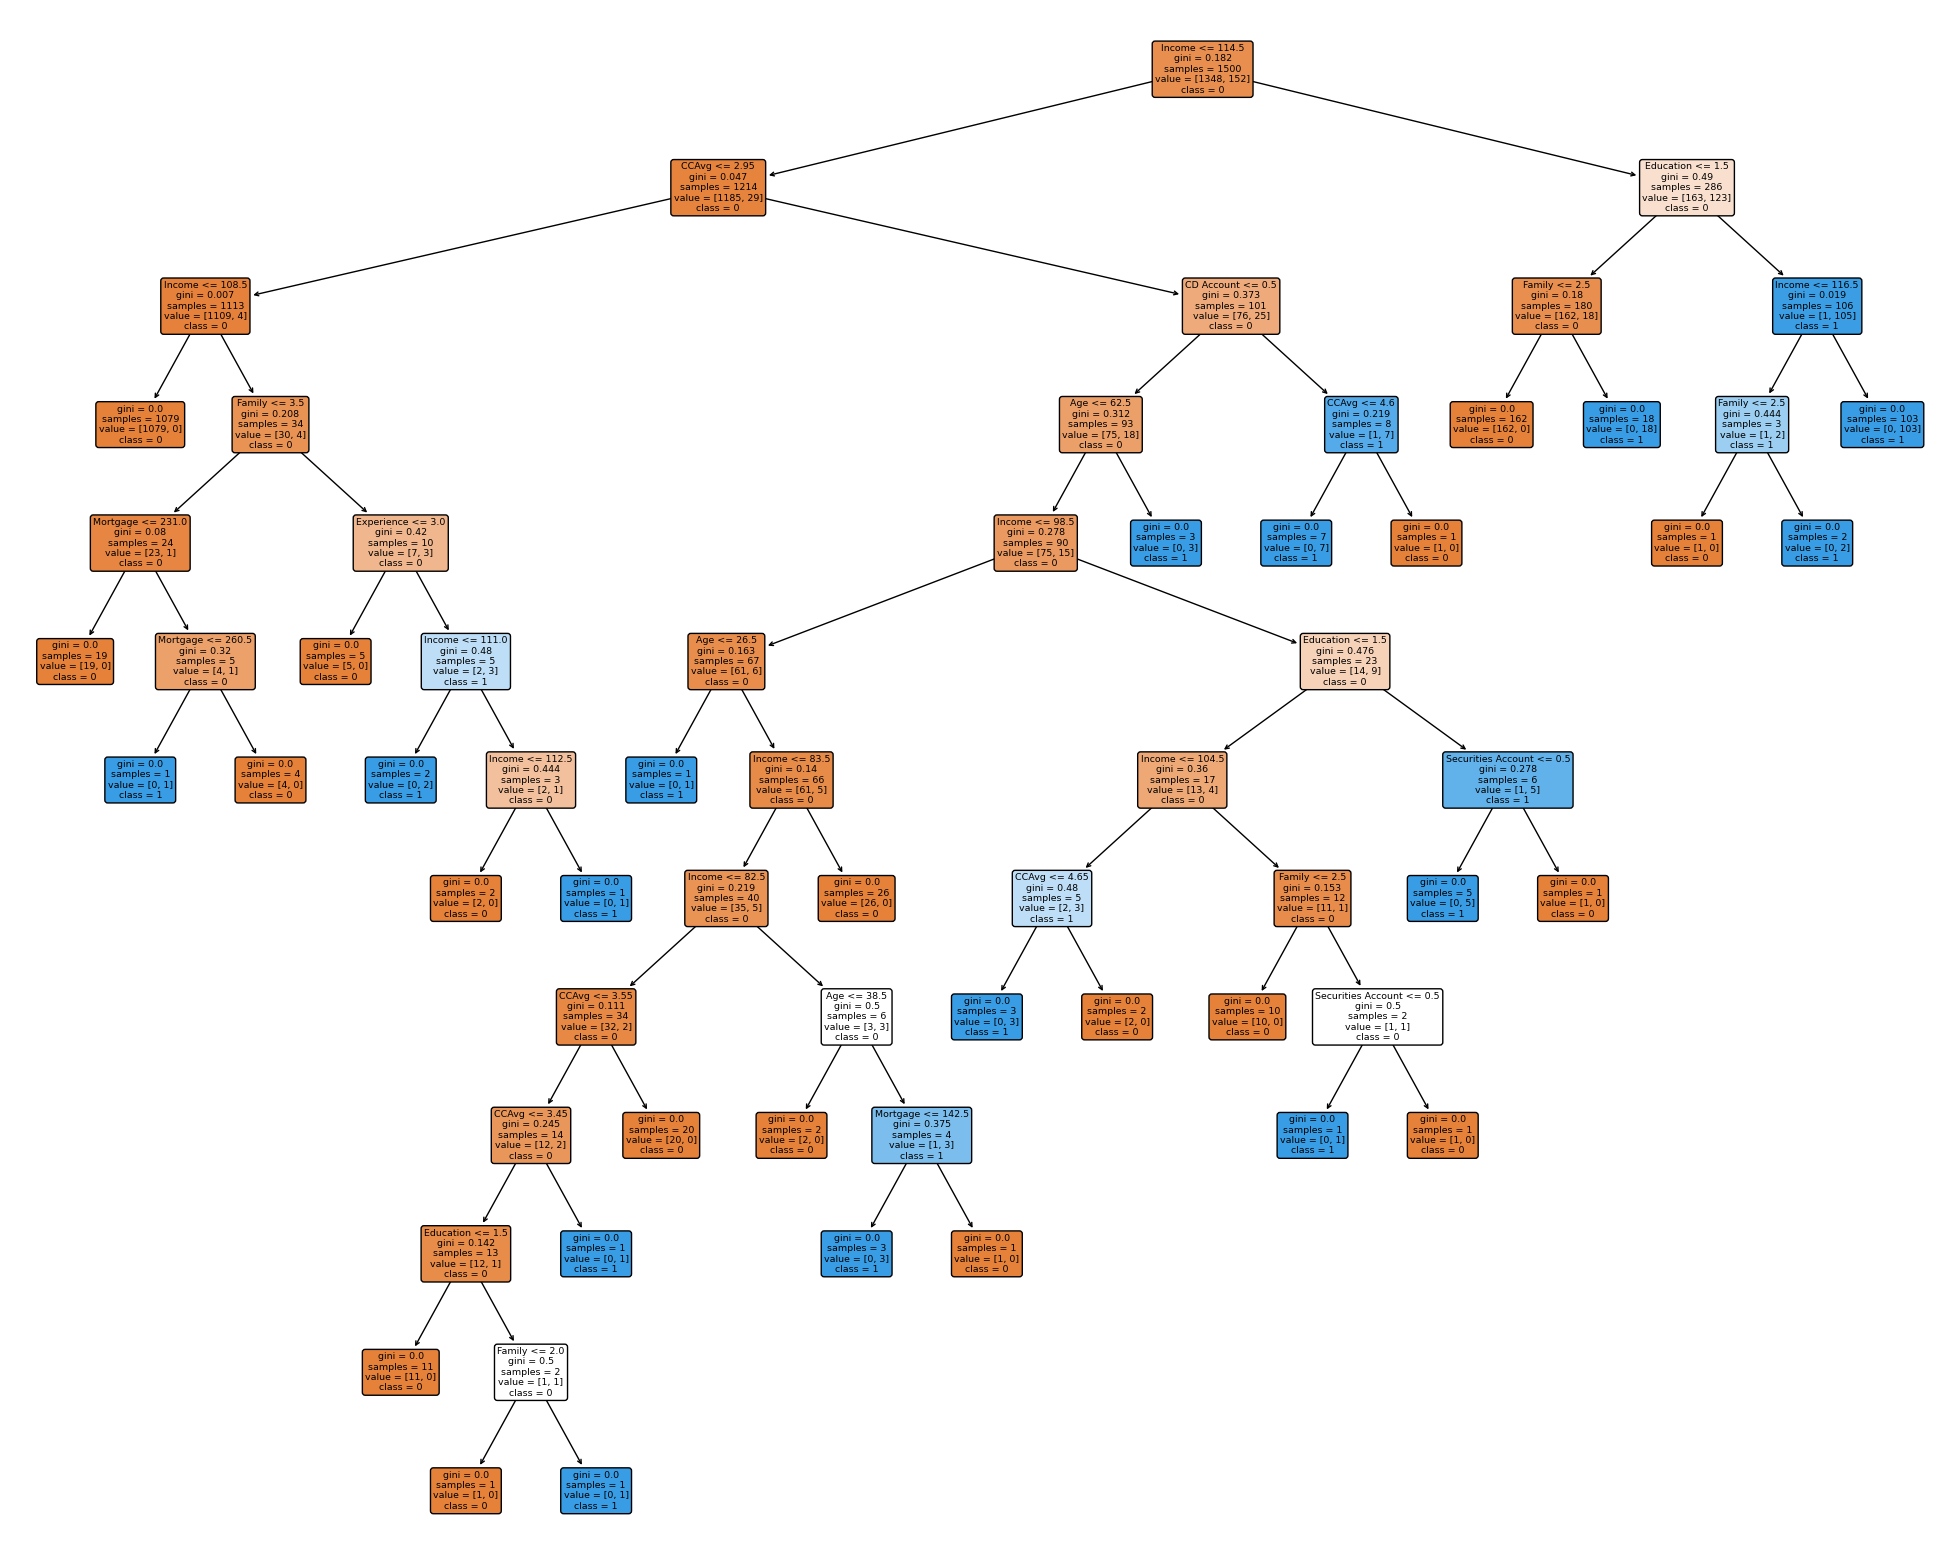

In [17]:
# Plot the tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf,
              feature_names=Ploan_input.columns.values,
              class_names=list(map(str, Ploan_target.unique())),
              rounded=True,
              filled=True)
plt.show()

In [19]:
dot_data = export_graphviz(clf, 
                           out_file=None,
                           feature_names=Ploan_input.columns.values,
                           class_names=list(map(str, Ploan_target.unique())),
                           filled=True,
                           rounded=True,
                           special_characters=True) 
graphviz.Source(dot_data)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Find the best tree based on cost complexity pruning

In [20]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

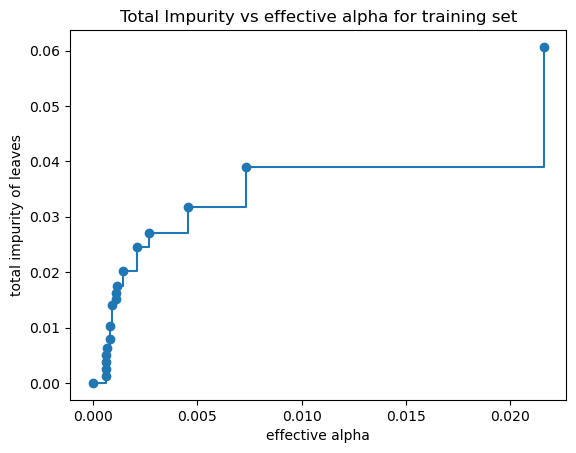

In [21]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

alpha 값이 증가할 수록 impurity가 변함

In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12345, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.060733012354121506


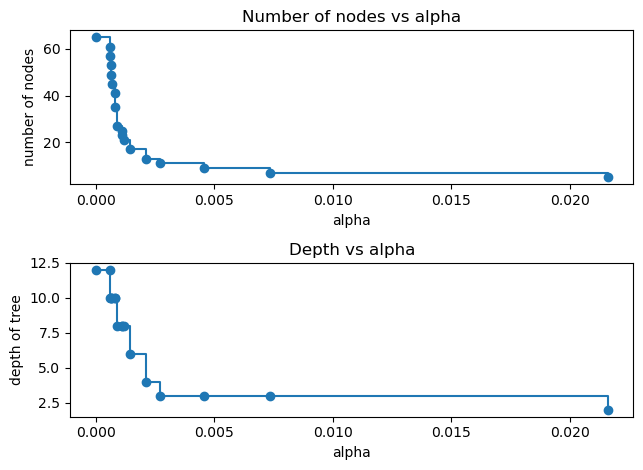

In [23]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

알파값이 변하면서 점점 트리가 단순해진다

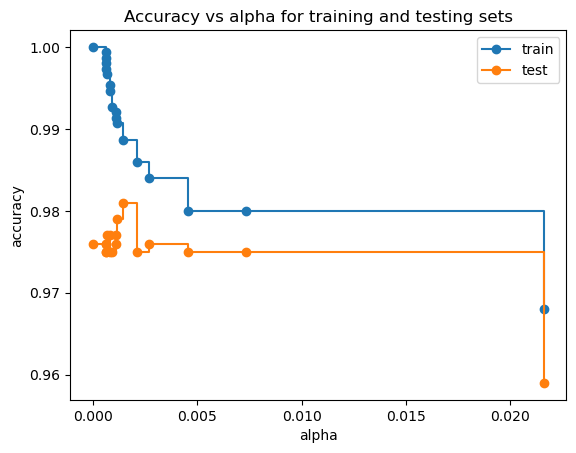

In [24]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Alpha 값이 작을수록 overfitting 클 수록 underfitting

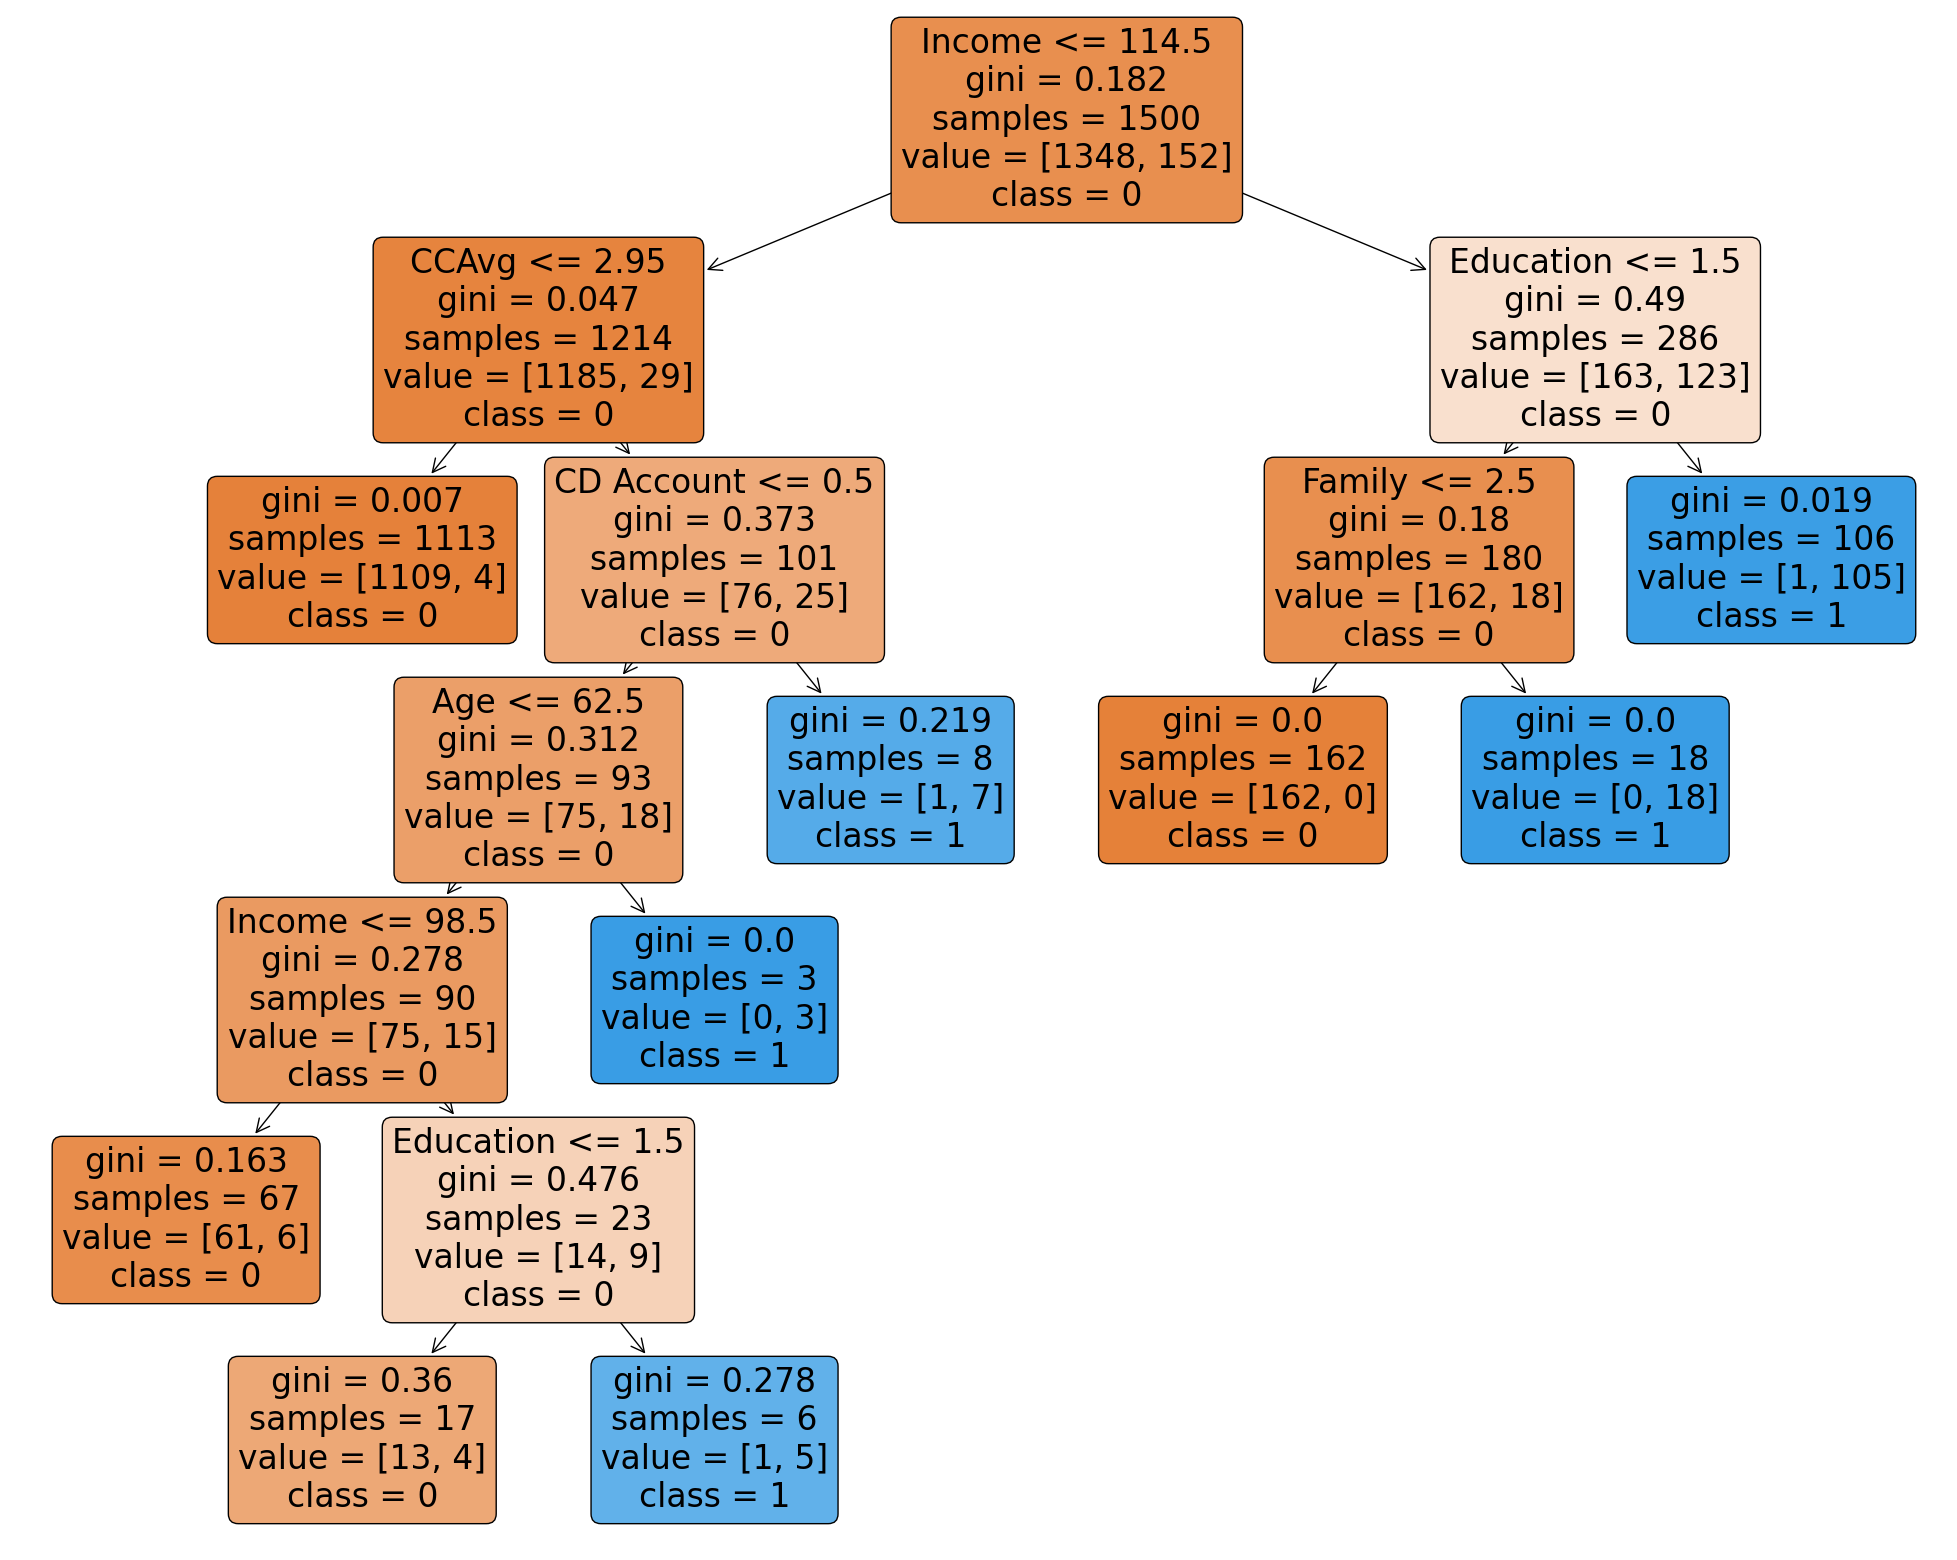

In [25]:
best_clf = clfs[np.argmax(test_scores)]#베스트 스코어 가져오기

fig = plt.figure(figsize=(25,20))
_ = plot_tree(best_clf,
              feature_names=Ploan_input.columns.values,
              class_names=list(map(str, Ploan_target.unique())),
              rounded=True,
              filled=True)

Prediction performance with the best tree

In [23]:
# Prediction
CART_post_prey = best_clf.predict(X_test)
cm = confusion_matrix(y_test, CART_post_prey)
Perf_Table.iloc[0] = perf_eval(cm)
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.894231,0.920792,0.991071,0.981,0.941407,0.907317
Pre-Pruning,NaN,NaN,NaN,NaN,NaN,NaN


## Pre-Pruning

### Training and Evaluation (Pre-Pruning)

Define parameter search space for pre-pruning

In [24]:
# Tree parameter settings
criterion = ["gini", "entropy", "log_loss"]
min_split = [10, 30, 50, 100]
max_depth = [1, 5, 10]

param_grid = {
    'criterion': criterion,
    'min_samples_split': min_split,
    'max_depth': max_depth
}

Find the optimal parameters

In [25]:
# Fit the decision tree model and evaluate the results
model = DecisionTreeClassifier(random_state=12345)
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', refit=True)
grid.fit(X_train, y_train)

# Find the best set of parameters
best_criterion = grid.best_params_['criterion']
best_split = grid.best_params_['min_samples_split']
best_depth = grid.best_params_['max_depth']

print("Best criterion:", best_criterion)
print("Best min_samples_split:", best_split)
print("Best max_depth:", best_depth)

# Evaluate the best model on the validation data
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

# Print results
print("Confusion matrix:\n", cm)
print("ROC AUC:", roc)

Best criterion: gini
Best min_samples_split: 50
Best max_depth: 5
Confusion matrix:
 [[889   7]
 [ 18  86]]
ROC AUC: 0.9095552884615384


Performance comparison

In [26]:
# Prediction
CART_pre_prediction = grid.predict(X_test)
cm = confusion_matrix(y_test, CART_pre_prediction)
Perf_Table.iloc[1] = perf_eval(cm)
Perf_Table

,TPR,Precision,TNR,Accuracy,BCR,F1-Measure
Post-Pruning,0.894231,0.920792,0.991071,0.981,0.941407,0.907317
Pre-Pruning,0.826923,0.924731,0.992188,0.975,0.905794,0.873096


Pre pruning의 파라미터를 조금 더 다양하게 해야 더 좋은 결과를 얻을 것 같다.

Plot the ROC curve

In [26]:
# Plot the ROC
CART_pre_prob = grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, CART_pre_prob)
plt.plot(fpr, tpr, color='darkorange', lw=3)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

NameError: name 'grid' is not defined

Plot the best tree

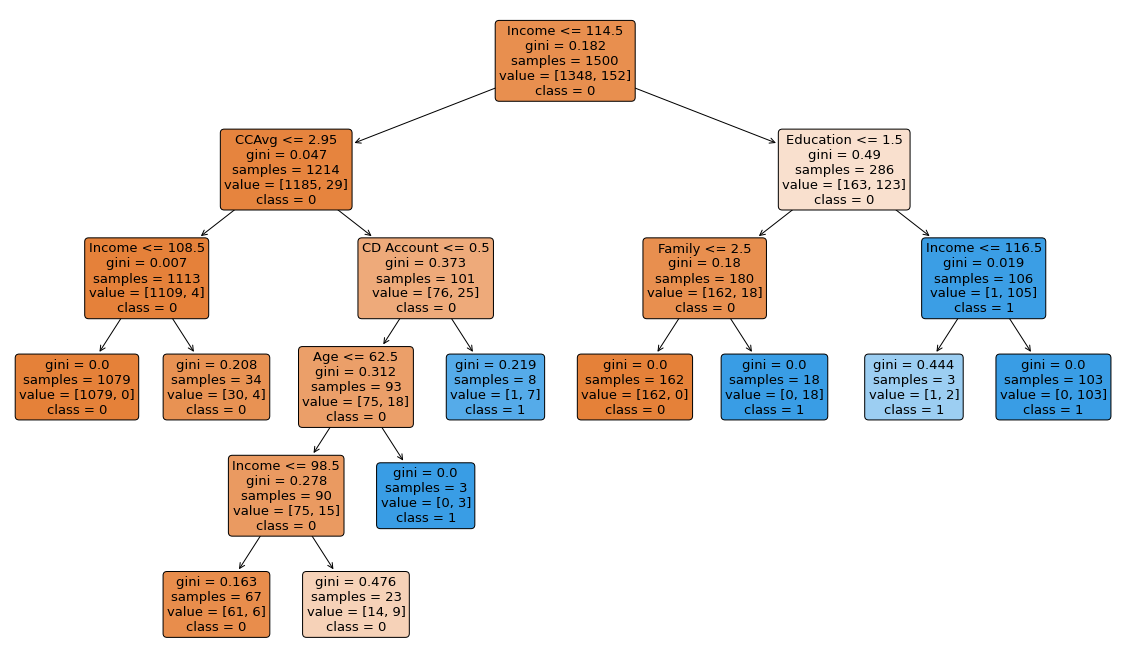

In [28]:
# Plot the best tree
CART_pre = DecisionTreeClassifier(**grid.best_params_)
CART_pre.fit(X_train,y_train)
plt.figure(figsize=(20,12))
plot_tree(CART_pre,
          feature_names=Ploan_input.columns.values,
          class_names=list(map(str, Ploan_target.unique())),
          rounded=True,
          filled=True)
plt.show()

---